In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_moons
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'y')

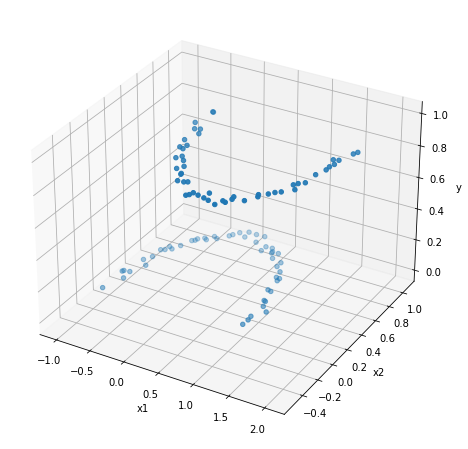

In [2]:
data = make_moons(100, random_state=3, noise=0.04)
features = pd.DataFrame(data[0])
labels = pd.Series(data[1])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(features[0], features[1], labels)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
np.random.seed(8)

# creating data using moons
data = make_moons(100, random_state=3, noise=0.04)
# features would be a DataFrame from the first set of data
features = pd.DataFrame(data[0])
# labels would be a DataFrame from the second set of data
labels = pd.Series(data[1])
# We add the bias column for the features DataFrame
features["bias"] = 1
#In the features DataFrame, the rows are permuted
shuffled_index = np.random.permutation(features.index)
shuffled_data = features.loc[shuffled_index]
#In the labels DataFrame, the rows are permuted as well
shuffled_labels = labels.loc[shuffled_index]
#The set will have an equivalent partition into two
mid_length = int(len(shuffled_data)/2)
#The train features are the first half
train_features = shuffled_data.iloc[:mid_length]
#the test features are the second half
test_features = shuffled_data.iloc[mid_length:]
#the train labels are the first half
train_labels = shuffled_labels.iloc[:mid_length]
#The test labels are the second half
test_labels = shuffled_labels.iloc[mid_length:]

#MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(1,), activation='logistic')
mlp.fit(train_features, train_labels)
nn_predictions = mlp.predict(test_features)
#Logistic regression
lr = LogisticRegression()
lr.fit(train_features, train_labels)
log_predictions = lr.predict(test_features)

#comparing the accuracies of the predictions
nn_accuracy = accuracy_score(test_labels, nn_predictions)
log_accuracy = accuracy_score(test_labels, log_predictions)

print("Logistic Regression Model Accuracy: ", log_accuracy)
print("Single Neuron Single Layer NN Model Accuracy: ", nn_accuracy)

Logistic Regression Model Accuracy:  0.88
Single Neuron Single Layer NN Model Accuracy:  0.48


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.48, 0.78, 0.86, 0.82, 0.84, 0.86]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


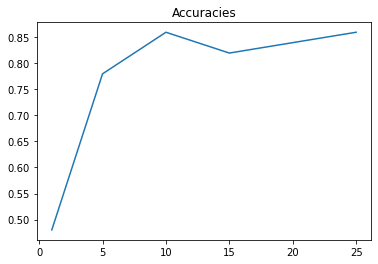

In [15]:
np.random.seed(8)

shuffled_index = np.random.permutation(features.index)
shuffled_data = features.loc[shuffled_index]
shuffled_labels = labels.loc[shuffled_index]

mid_length = int(len(shuffled_data)/2)
train_features = shuffled_data.iloc[:mid_length]
test_features = shuffled_data.iloc[mid_length:]
train_labels = shuffled_labels.iloc[:mid_length]
test_labels = shuffled_labels.iloc[mid_length:]

neurons = [1, 5, 10, 15, 20, 25]
accuracies = []

for n in neurons:
#     mlp = MLPClassifier(hidden_layer_sizes=(n,), activation='logistic', max_iter=3000)
    mlp = MLPClassifier(hidden_layer_sizes=(n,), activation='logistic')
    mlp.fit(train_features, train_labels)
    nn_predictions = mlp.predict(test_features)
    accuracy = accuracy_score(test_labels, nn_predictions)
    accuracies.append(accuracy)
    
print(accuracies)
plt.title("Accuracies")
plt.plot(neurons,accuracies)